# <center> Predicting Stars, Galaxies & Quasars with ML Model

---    

**Project Name: Predicting Stars, Galaxies & Quasars with ML Model**

---

<center> <img src = "http://localhost:8888/files/gsn069_525.gif" width = 55%>

## Workflow of this notebook
**1)** [Introducing Dataset](#h1)      
**2)** [Importing necessary libraries and modules for this notebook](#h2)    
**3)** [Exploring the Dataset](#h3)      
**4)** [Preparing data for our model](#h4)           
**5)** [Scaling the data for our model and checking the distribution plots](#h5)   
**6)** [Building the ML models and checking results](#h6)        


# About the Problem & Our Dataset - <a name ="h1"></a>

### So what exactly are stars, galaxies, and quasars? 

A GALAXY is a gravitationally bound system of stars, stellar remnants, interstellar gas, dust, and dark matter. Galaxies are categorised according to their visual morphology as elliptical, spiral, or irregular. Many galaxies are thought to have supermassive black holes at their active centers.</p>

<br> <center> <img src = "http://localhost:8888/files/milky-way-5295155__340.jpg" width = 50%> <br> 

A STAR is a type of astronomical object consisting of a luminous spheroid of plasma held together by its own gravity. The nearest star to Earth is the Sun.

<br> <center> <img src = "http://localhost:8888/files/stars-841403680-170667a.jpg" width = 50%>


A QUASAR, also known as a quasi-stellar object, is an extremely luminous active galactic nucleus (AGN). The power radiated by quasars is enormous. A typical quasar is 27 trillion times brighter than our sun! If you were to place a quasar at the distance of Pluto, it would vaporise all of Earth’s oceans to steam in a fifth of a second.

<br>  <center> <img src = "http://localhost:8888/files/quasar-stars-black-hole-light-hd-wallpaper-preview.jpg" width = 50%>

The dataset we'll be using for this model is the [Sloan Digital Sky Survey DR14](https://www.kaggle.com/datasets/lucidlenn/sloan-digital-sky-survey)

The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar. 30% of it is used in testing the model performance and 70% in training of the model.

# Importing necessary libraries and modules for the dataset <a name = 'h2'></a>

### First of all we need to import all the packages we need. Numpy and Pandas for data manipulation and all the modules from sklearn for the machine learning feature


In [1]:
#Importing Necessary Libraries

'''Data Handling & Linear Algebra'''
import numpy as np
import pandas as pd

'''Visualisation'''
import matplotlib.pyplot as plt
import seaborn as sns

'''Data Analysis'''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

'''Measuring Classification Performance'''
from sklearn.metrics import accuracy_score

'''Classification & Regression'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

'''Ignore warnings'''
import warnings
warnings.filterwarnings("ignore") 

%matplotlib inline

**Documents of the above used libraries and modules in case you aren't familiar and want to know more about it:-**
- [numpy](https://numpy.org/doc/1.23/user/absolute_beginners.html)
- [pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
- [matplotlib.pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)
- [seaborn](https://seaborn.pydata.org/tutorial/introduction.html)
- [All sklearn libraries](https://scikit-learn.org/stable/user_guide.html)


# Exploratory Analysis<a name ='h3'></a>

In [2]:
#Loading data into a dataframe
data = pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv")

In [3]:
#Displaying the first 5 rows of the dataset
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
#Displaying the dimensions of the dataset
data.shape

(10000, 18)

## Information about the columns

## Coordinates in Astronomy
Columns = (RA and Dec)
<br> <center> <img src="http://localhost:8888/files/RA-Dec-wiki-Tom-RuenCC-BY-SA-3.0.jpg" alt="Alt text" width="500"/>

## The Astronomy Color Scheme
Columns = (U,G,R,I,Z)
<br> <center> <img src="http://localhost:8888/files/UGRIZ.png?_xsrf=2%7Cbe88a3da%7C78379e2263e509a168c1eada317ce6b4%7C1691610054" alt="Alt text" width="700"/>

## Photometric data info
#### 1. Run: 
   The SDSS camera worked in a drift scan mode. Each continuous drift scan is referred to as a run.
#### 2. Camcol: 
   The SDSS Camera had six parallel columns, meaning that run is divided into six parallel scanslines, one for each camera column. These images are known as camcols. Numbered 1 to 6.
#### 3. Rerun: 
   The number of processings after the image was taken.
#### 4. Fields: 
   Each camcol is broken into a series of overlapping fields, each 1489 pixels long.

## Spectral data info
 
#### Plate:
   An integer indicating which SDSS plug plate was used to collect the spectrum.
#### MJD (Modified Julian Date):
   An integer denoting the modified julian date of the night when observation was carried out.
#### FibreID:
   An integer denoting the fibre number.
        

#### The object id columns are of little use in the analysis hence we can delete them from the dataset.

In [5]:
#Drop the object id columns, they are of no use in the analysis
data.drop(['objid','specobjid'], axis=1, inplace=True)

In [6]:
#Data after dropping columns
data.head(10)

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,STAR,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,STAR,0.000590,3306,54922,512
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,STAR,0.000315,324,51666,594
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,GALAXY,0.100242,287,52023,559
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,STAR,0.000315,3306,54922,515
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,STAR,0.000089,323,51615,595
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,GALAXY,0.040508,288,52000,400


In [7]:
data.shape

(10000, 16)

In [8]:
data.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,5.353854,8410.000000,57481.000000,1000.000000


In [9]:
#Checking for null values to determine completeness of the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  object 
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(7), object(1)
memory usage: 1.2+ MB


No missing data so the dataset is complete with no voids and missing cells

### The Target from data is Data classification to Star Galaxy or Quasar, so the class column has 3 Categories and in this case we need to convert them into numeric data.

Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. ``` LabelEncoder().fit ``` encodes labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier. You can read more about it [here](https://stackoverflow.com/questions/66056695/what-does-labelencoder-fit-do)!




In [10]:
le = LabelEncoder().fit(data['class'])
data['class'] = le.transform(data['class'])

# The Final Dataset <a name = 'h4'></a>

In [11]:
#Printing the dataset after all the changes to check the dataset
data.head(10)

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,2,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,2,0.000590,3306,54922,512
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,2,0.000315,324,51666,594
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,0,0.100242,287,52023,559
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,2,0.000315,3306,54922,515
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,2,0.000089,323,51615,595
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,0,0.040508,288,52000,400


### After lable encoding, Galaxies have been replaced by number 0, Quasars by number 1 and Stars by number 2

In [12]:
#Checking the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  int64  
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 1.2 MB


We can understand that the dataset is complete with no null values. And since the dataset has only numerical values now, there's no need of further encoding and type conversions.

Perform train and test split

In [13]:
X = data.drop('class', axis=1)
y = data['class']

# Data Scaling <a name = 'h5'></a>

Scaling means converting floating-point feature values from their natural range (for example, 100 to 900) into a standard range—usually 0 and 1 (or sometimes -1 to +1). ``` StandardScaler ``` follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance. You can read more about other types of scalers [here](https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/) and scaling in general [here](https://developers.google.com/machine-learning/data-prep/transform/normalization).

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True , with_mean= True , with_std = True)
X= scaler.fit_transform(X)

In [15]:
#Show data
X[:20]

array([[ 0.16745842, -0.58492272,  1.03148637, -0.34855938, -0.83728027,
        -0.94605772, -0.99534154, -0.83806089,  0.        ,  0.21085172,
        -0.21763043, -0.36973112,  1.03148936,  1.30931064,  0.66863177],
       [ 0.16886159, -0.58311429,  0.05243046, -0.16653251, -0.15415531,
        -0.08264457, -0.02604308, -0.83806089,  0.        ,  0.21085172,
        -0.21763043, -0.36984929, -0.63621258, -0.87919741,  0.91101156],
       [ 0.17057433, -0.58347525,  0.92156796,  0.86709322,  0.59315368,
         0.44120145,  0.31452753, -0.83806089,  0.        ,  0.21085172,
        -0.21147922, -0.05302706, -0.65633905, -0.60919097,  0.77527888],
       [ 0.17455754, -0.58650069, -1.03063038, -0.81362749, -0.63669227,
        -0.52660429, -0.43092107, -0.83806089,  0.        ,  0.21085172,
        -0.20532801, -0.36999261,  1.03148936,  1.30931064,  0.76073609],
       [ 0.17482457, -0.58441247, -1.29023238, -1.17251944, -0.37676237,
        -0.02510121,  0.15827647, -0.83806089, 

In [16]:
#Performing the 30% test and 70% train split here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=128)

# Density Distribution Plots

<Axes: xlabel='class', ylabel='count'>

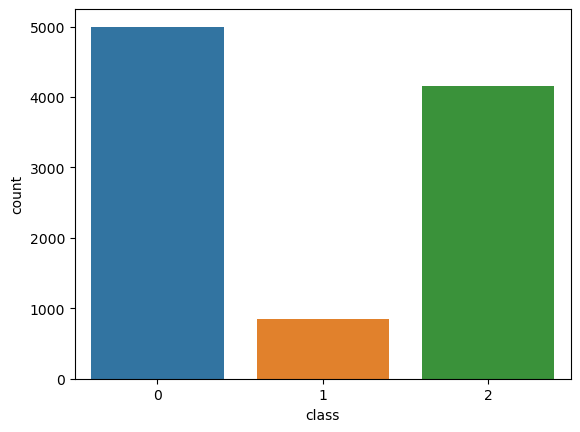

In [17]:
#Checking the number of labels for each class of the dataset where 0 = Galaxy, 1 = Quasar, 2 = Star.
sns.countplot(x=data['class'])

### Some information about the filters used while gathering the data:
"U" stands for ultraviolet.
"G" stands for green. 
"R" stands for red. 
"I" stands for infrared. 

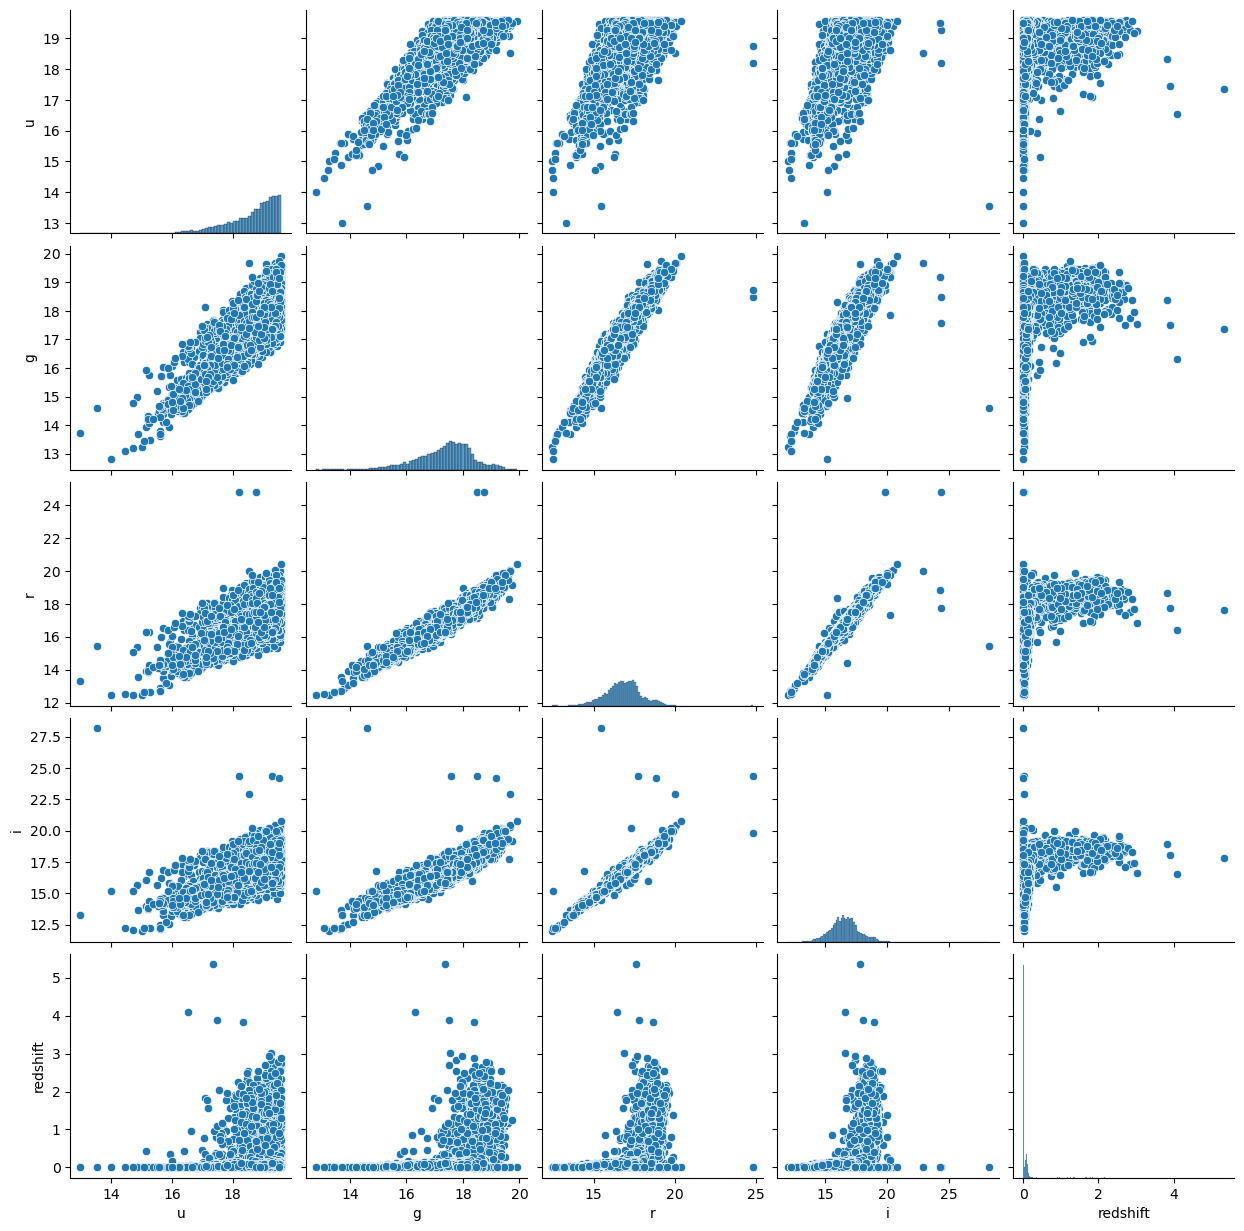

In [32]:
#Using pairplots to establish and understand interdependancy of train features
sns.pairplot(data[['u','g','r','i','redshift']])
#how u is distributed wrt classes

## Saparation Power of the Variables

### For u

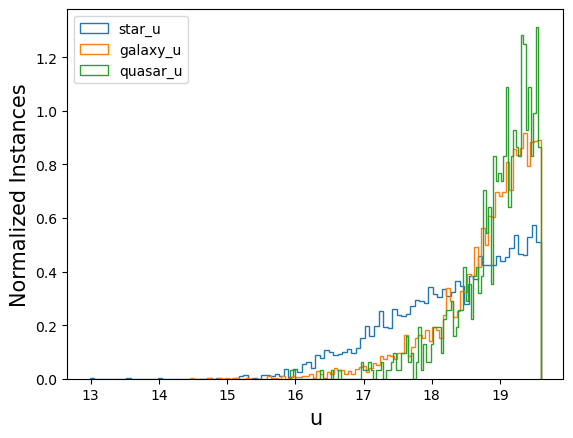

In [19]:
data_galaxy = data[data["class"]==0]
data_quasar = data[data["class"]==1]
data_star = data[data["class"]==2]
plt.hist(data_star["u"],bins = 100,label = "star_u",histtype = "step" , density = True)
plt.hist(data_galaxy["u"],bins = 100, label = "galaxy_u",histtype = "step", density = True)
plt.hist(data_quasar["u"],bins = 100, label = "quasar_u",histtype = "step" , density = True)
plt.xlabel("u", fontsize = 15)
plt.ylabel("Normalized Instances", fontsize = 15)
plt.legend()
plt.show()

### For r

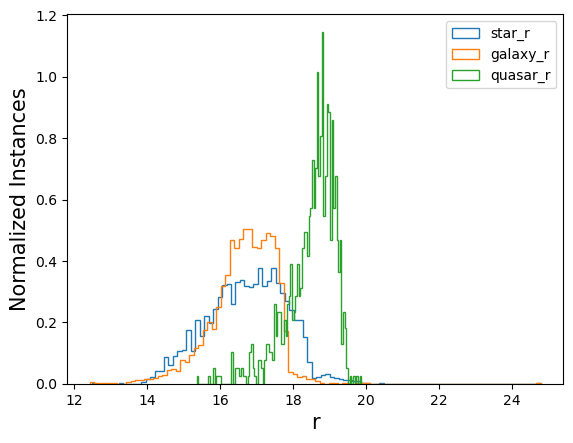

In [20]:
plt.hist(data_star["r"],bins = 100,label = "star_r",histtype = "step", density = True )
plt.hist(data_galaxy["r"],bins = 100, label = "galaxy_r",histtype = "step", density = True)
plt.hist(data_quasar["r"],bins = 100, label = "quasar_r" ,histtype = "step", density = True)
plt.xlabel("r", fontsize = 15)
plt.ylabel("Normalized Instances", fontsize = 15)
plt.legend()
plt.show()

### For z

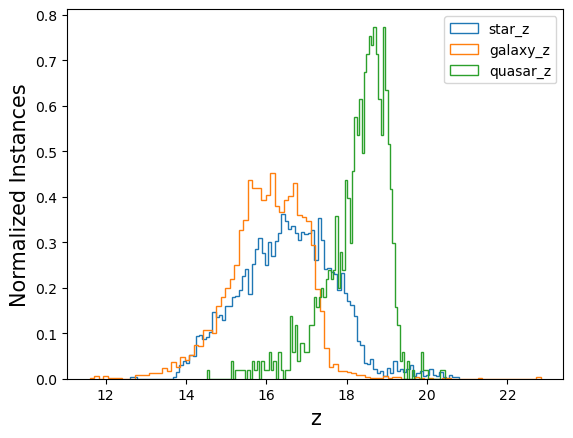

In [21]:
plt.hist(data_star["z"],bins = 100,label = "star_z",histtype = "step", density = True)
plt.hist(data_galaxy["z"],bins = 100, label = "galaxy_z",histtype = "step", density = True)
plt.hist(data_quasar["z"],bins = 100, label = "quasar_z" ,histtype = "step", density = True)
plt.xlabel("z", fontsize = 15)
plt.ylabel("Normalized Instances", fontsize = 15)
plt.legend()
plt.show()

### For Redshift

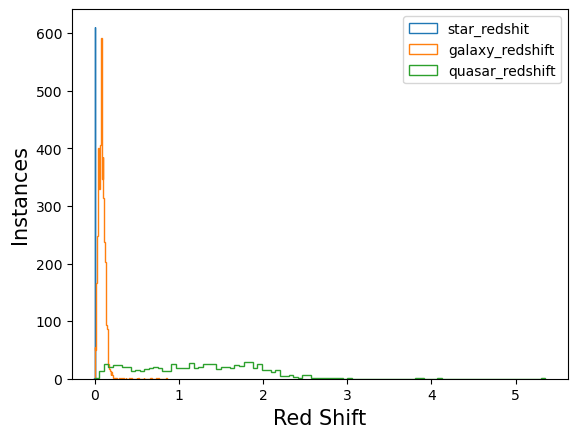

In [22]:
plt.hist(data_star["redshift"],bins = 100,label = "star_redshit",histtype = "step")
plt.hist(data_galaxy["redshift"],bins = 100, label = "galaxy_redshift",histtype = "step")
plt.hist(data_quasar["redshift"],bins = 100, label = "quasar_redshift" ,histtype = "step")
plt.xlabel("Red Shift", fontsize = 15)
plt.ylabel("Instances", fontsize = 15)
plt.legend()
plt.show()

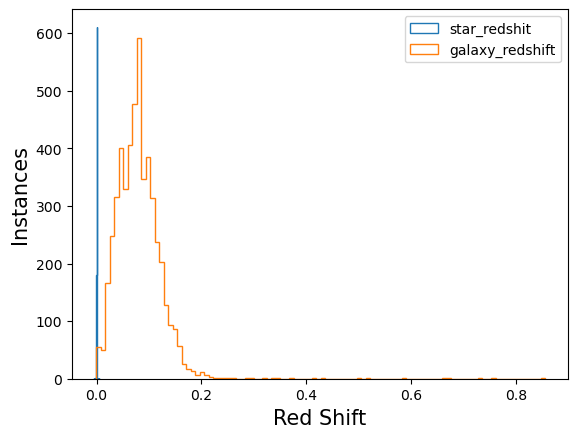

In [23]:
plt.hist(data_star["redshift"],bins = 100,label = "star_redshit",histtype = "step")
plt.hist(data_galaxy["redshift"],bins = 100, label = "galaxy_redshift",histtype = "step")
#plt.hist(data_quasar["redshift"],bins = 100, label = "quasar_redshift" ,histtype = "step")
plt.xlabel("Red Shift", fontsize = 15)
plt.ylabel("Instances", fontsize = 15)
plt.legend()
plt.show()

## Machine Learning models (Classification models) <a name = 'h6'></a>

### Decision tree classifier -

<p align="justify">The decision of making strategic splits heavily affects a tree’s accuracy. The decision criteria are different for classification and regression trees.</p>

<p align="justify">Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that the purity of the node increases with respect to the target variable. The decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.</a>

<br> <img src="http://localhost:8888/files/Decisiontrees.png" width = 80%>

<br> The algorithm selection is also based on the type of target variables. Let us look at some algorithms used in Decision Trees:

1. ID3 → (extension of D3)

2. C4.5 → (successor of ID3)

3. CART → (Classification And Regression Tree)

4. CHAID → (Chi-square automatic interaction detection Performs multi-level splits when computing classification trees)

5. MARS → (multivariate adaptive regression splines)

<p align="justify">To understand these, let's have a look at the most primitive of these - ID3.

[Link for the example.](https://towardsdatascience.com/decision-trees-for-classification-id3-algorithm-explained-89df76e72df1)

You can read further about the methods [here](https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html).  

Let's consider this example -

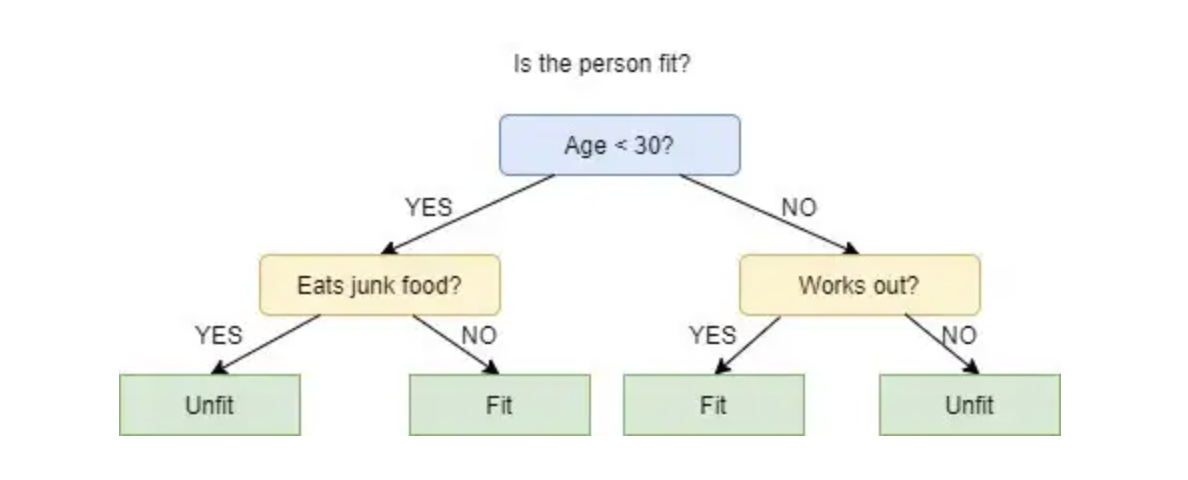

The initial node is called the <b>root</b> node (colored in blue), the final nodes are called the <b>leaf</b> nodes (colored in green) and the rest of the nodes are called <b>intermediate</b> or <b>internal</b> nodes.
The root and intermediate nodes represent the decisions while the leaf nodes represent the outcomes.

ID3 stands for Iterative Dichotomiser 3 and is named such because the algorithm iteratively (repeatedly) dichotomizes(divides) features into two or more groups at each step.
Invented by Ross Quinlan, ID3 uses a top-down greedy approach to build a decision tree. In simple words, the top-down approach means that we start building the tree from the top and the greedy approach means that at each iteration we select the best feature at the present moment to create a node.
<b>Most generally ID3 is only used for classification problems with nominal features only.</b>

ID3 uses Information Gain or just Gain to find the best feature. Information Gain calculates the reduction in the entropy and measures how well a given feature separates or classifies the target classes. The feature with the highest Information Gain is selected as the best one.

In simple words, Entropy is the measure of disorder and the Entropy of a dataset is the measure of disorder in the target feature of the dataset.
In the case of binary classification (where the target column has only two types of classes) entropy is 0 if all values in the target column are homogenous(similar) and will be 1 if the target column has equal number values for both the classes.

ID3 Steps -

1. Calculate the Information Gain of each feature.
2. Considering that all rows don’t belong to the same class, split the dataset S into subsets using the feature for which the Information Gain is maximum.
3. Make a decision tree node using the feature with the maximum Information gain.
4. If all rows belong to the same class, make the current node as a leaf node with the class as its label.
5. Repeat for the remaining features until we run out of all features, or the decision tree has all leaf nodes.

We denote our dataset as S, entropy is calculated as -
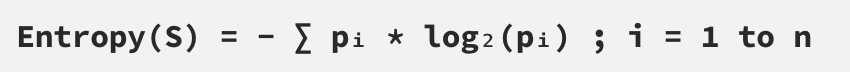
Where n is the total number of classes in the target column;
pᵢ is the probability of class ‘i’ or the ratio of “number of rows with class i in the target column” to the “total number of rows” in the dataset.

Information Gain for a feature column A is calculated as -


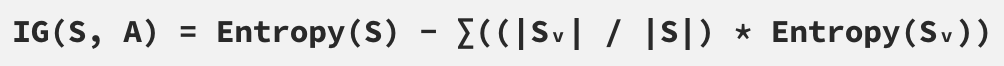

where Sᵥ is the set of rows in S for which the feature column A has value v, |Sᵥ| is the number of rows in Sᵥ and likewise |S| is the number of rows in S.

In [24]:
# Decision Tree Classifier
dtClassifer = DecisionTreeClassifier(max_leaf_nodes=15,max_depth=3)

### Logistic regression classifier -

<p align="justify">Machine learning generally involves predicting a quantitative outcome or a qualitative class. The former is commonly referred to as a regression problem. In the scenario of linear regression, the input is a continuous variable, and the prediction is a numerical value. When predicting a qualitative outcome (class), the task is considered a classification problem. Examples of classification problems include predicting what products a user will buy or if a target user will click on an online advertisement. 

<p align="justify">Not all algorithms fit cleanly into this simple dichotomy, though, and logistic regression is a notable example. Logistic regression is part of the regression family as it involves predicting outcomes based on quantitative relationships between variables. However, unlike linear regression, it accepts both continuous and discrete variables as input and its output is qualitative. In addition, it predicts a discrete class such as “Yes/No” or “Customer/Non-customer”. 

<br> <center> <img src="http://localhost:8888/files/LogReg_1.png" alt="Alt text" width="700"/>
<br> <center> <img src="http://localhost:8888/files/logistic-regression-in-machine-learning.png" alt="Alt text" width="700"/>    

<br> <p align="justify">In practice, the logistic regression algorithm analyzes relationships between variables. It assigns probabilities to discrete outcomes using the Sigmoid function, which converts numerical results into an expression of probability between 0 and 1.0. Probability is either 0 or 1, depending on whether the event happens or not. For binary predictions, you can divide the population into two groups with a cut-off of 0.5. Everything above 0.5 is considered to belong to group A, and everything below is considered to belong to group B.

You can read further about them [here](https://www.kdnuggets.com/2022/07/logistic-regression-work.html#:~:text=is%20Logistic%20Regression%3F-,Logistic%20regression%20is%20a%20Machine%20Learning%20classification%20algorithm%20that%20is,the%20logistic%20of%20the%20result.)

In [25]:
#Linear Classifier - Logistic Regression
LRClassifer = LogisticRegression()

### KNN classifier -

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

“Birds of a feather flock together.”

<br> <img src="http://localhost:8888/files/Knearestneughborsg.png" width = 40%> 

<br> <p align="justify">Image showing how similar data points typically exist close to each other
Notice in the image above that most of the time, similar data points are close to each other. The KNN algorithm hinges on this assumption being true enough for the algorithm to be useful. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph.


In [26]:
#Nearest Neighbor Classifier
NeNeClassifier = KNeighborsClassifier(n_neighbors=3)

In [27]:
#Fitting the models to the dataset
dtClassifer.fit(X_train, y_train)

LRClassifer.fit(X_train, y_train)

NeNeClassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
#Getting the prediction set of the models
y_preds = dtClassifer.predict(X_test)
y_predsLR = LRClassifer.predict(X_test)
y_predsNeNe = NeNeClassifier.predict(X_test)

In [29]:
#Displaying the last 10 predictions on the test split as output by all the models

print(y_preds[:10],'\n',y_test[:10])

print("\n*******************************************************")
print(y_predsLR[:10],'\n',y_test[:10])

print("\n*******************************************************")
print(y_predsNeNe[:10],'\n',y_test[:10])

[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int64

*******************************************************
[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int64

*******************************************************
[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int64


### Classification Report through Confusion Matrix

#### Lets First understand what a confusion matrix is and how it is going to help us

<br> <center> <img src="http://localhost:8888/files/Confusion%20matrix.png" alt="Alt text" width="700"/>
         
<br> <center> <img src="http://localhost:8888/files/confusion%20matrix%20formulas.png" alt="Alt text" width="500"/>


<br> <center> <img src="http://localhost:8888/files/example.PNG" alt="Alt text" width="700"/>


In [30]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2']

print('\033[1m  Decision Tree -\n  \033[0m',classification_report(y_preds,y_test,target_names=target_names) + '\n')
print('\033[1m  Logistic Regression -\n  \033[0m',classification_report(y_predsLR,y_test,target_names=target_names) + '\n')
print("\033[1m  KNN Classifier -\n  \033[0m",classification_report(y_predsNeNe,y_test,target_names=target_names) + '\n')

  Decision Tree -
                 precision    recall  f1-score   support

           0       0.99      0.99      0.99      2531
           1       0.93      0.95      0.94       398
           2       1.00      1.00      1.00      2071

    accuracy                           0.99      5000
   macro avg       0.97      0.98      0.97      5000
weighted avg       0.99      0.99      0.99      5000


  Logistic Regression -
                 precision    recall  f1-score   support

           0       0.97      0.98      0.97      2480
           1       0.95      0.96      0.95       404
           2       0.99      0.96      0.98      2116

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000


  KNN Classifier -
                 precision    recall  f1-score   support

           0       0.94      0.89      0.91      2669
           1       0.87      0.98      0.92       363
   

### Task for you 

1. Try visualizing the decision tree for the above generated model.

2. Try correlating these features to come up with a selection that perhaps improves the model performance; create a function that can predict weather the object is a Star/ Quasar/ Galaxy by taking in some specific imputs (Other than the classification column we used here ofcourse)

